In [ ]:
#importation des bibliotheques
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [ ]:
# Chemin vers le dossier contenant les données des champignons
data_path = "/content/drive/MyDrive/CHAMPIGNONS_DATA"
# Liste des noms de classe, obtenue en listant les dossiers dans le chemin des données
class_names = os.listdir(data_path)
# Afficher les noms de classe
print(class_names)

['Beauveria brongniartii--Aspect macroscopique', 'Beauveria bassiana--Aspect microscopique', 'Trichoderma viride--Aspect macroscopique', 'Trichoderma harzianum--Aspect microscopique', 'Trichoderma viride--Aspect microscopique', 'Trichoderma harzianum--Aspect macroscopique', 'Trichoderma Asperellum--Aspect microscopique', 'Trichoderma Asperellum--Aspect macroscopique', 'Metarhizium roberstii--Aspect microscopique', 'Metarhizium roberstii--Aspect macroscopique', 'Metarhizium brunneum--Aspect microscopique', 'Metarhizium anisopliae--Aspect microscopique', 'Metarhizium brunneum--Aspect macroscopique', 'Beauveria brongniartii--Aspect microscopique', 'Beauveria bassiana--Aspect macroscopique', 'Metarhizium anisopliae--Aspect macroscopique']


In [ ]:
# Chemins vers les dossiers de données d'entraînement, de test et de validation
train_dir = os.path.join(data_path, 'train')  # Chemin vers les données d'entraînement
test_dir = os.path.join(data_path, 'test')    # Chemin vers les données de test
val_dir = os.path.join(data_path, 'validation')  # Chemin vers les données de validation

# Création des dossiers si ils n'existent pas déjà
os.makedirs(train_dir, exist_ok=True)  # Créer le dossier d'entraînement s'il n'existe pas
os.makedirs(test_dir, exist_ok=True)   # Créer le dossier de test s'il n'existe pas
os.makedirs(val_dir, exist_ok=True)    # Créer le dossier de validation s'il n'existe pas


In [ ]:
from shutil import move
from sklearn.model_selection import train_test_split

for class_name in class_names:
    class_path = os.path.join(data_path, class_name)
    image_files = os.listdir(class_path)

    #Séparer les images en ensembles d'entraînement, de test et de validation
    train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    #Déplacer les images vers leurs répertoires respectifs
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        move(src, dst)

    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        move(src, dst)

    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_dir, class_name, file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        move(src, dst)


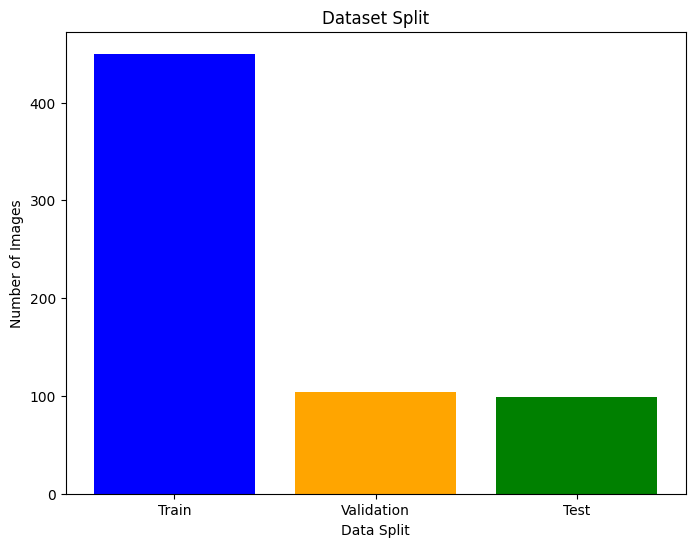

In [ ]:
import os
import matplotlib.pyplot as plt

# Definir paths pour train, test, et validation directories
train_directory = '/content/drive/MyDrive/CHAMPIGNONS_DATA/train'
val_directory = '/content/drive/MyDrive/CHAMPIGNONS_DATA/validation'
test_directory = '/content/drive/MyDrive/CHAMPIGNONS_DATA/test'

# Count number of images in each directory
def count_images_in_dir(directory):
    return sum([len(files) for root, dirs, files in os.walk(directory)])

train_images = count_images_in_dir(train_dir)
val_images = count_images_in_dir(val_dir)
test_images = count_images_in_dir(test_dir)

# Data
dataset_sizes = [train_images, val_images, test_images]
labels = ['Train', 'Validation', 'Test']

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, dataset_sizes, color=['blue', 'orange', 'green'])
ax.set_xlabel('Data Split')
ax.set_ylabel('Number of Images')
ax.set_title('Dataset Split')
plt.show()




Text(0.5, 1.0, 'Beauveria brongniartii : Aspect microscopique')

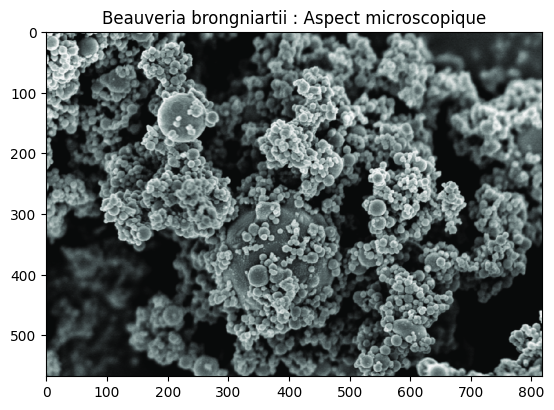

In [ ]:
#test
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/CHAMPIGNONS_DATA/train/Beauveria brongniartii--Aspect microscopique/Scanning-electron-micrographs-of-Beauveria-brongniartii-Fe-0-NPs.png"))
plt.title("Beauveria brongniartii : Aspect microscopique")

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
SIZE = [128, 128]


In [ ]:
#utilisation du VGG
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
#Charger le modèle VGG19 avec les poids pré-entraînés sur ImageNet
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Parcourir chaque couche du modèle VGG19
for layer in vg19.layers:
    layer.trainable = False

In [ ]:
# Appliquer une couche "Flatten" à la sortie du modèle VGG19
x = Flatten()(vg19.output)


In [ ]:
# Ajouter une couche Dense pour les prédictions avec une activation softmax
prediction = Dense(5, activation="softmax")(x)
# Créer un nouveau modèle en spécifiant les entrées du modèle VGG19 et les sorties de la couche de prédiction
modelvg = Model(inputs=vg19.input, outputs=prediction)

In [ ]:
#show summary
modelvg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
#compilation du modele
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
# Get the absolute directory paths from the file paths
train_dir = "/content/drive/MyDrive/CHAMPIGNONS_DATA/train"
val_dir = "/content/drive/MyDrive/CHAMPIGNONS_DATA/validation"
test_dir = "/content/drive/MyDrive/CHAMPIGNONS_DATA/test"


In [ ]:
train_dir

'/content/drive/MyDrive/CHAMPIGNONS_DATA/train'

In [ ]:
# Create ImageDataGenerator instances with rescaling and other augmentations if needed
train_datagen_vg19 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen_vg19 = ImageDataGenerator(rescale=1./255)
test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generer data batches pour training, validation, and testing
training_set_vg19 = train_datagen_vg19.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

validation_set_vg19 = val_datagen_vg19.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_set_vg19 = test_datagen_vg19.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 450 images belonging to 16 classes.
Found 104 images belonging to 16 classes.
Found 99 images belonging to 16 classes.


In [ ]:

import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)



In [ ]:
from keras.models import Model                    #-------------------------------------------
from keras.layers import Dense

num_classes = 16  #Number of classes

# Update the output layer to have the correct number of units (units=num_classes)
output_layer = Dense(num_classes, activation='softmax')(modelvg.layers[-2].output)
modelvg = Model(inputs=modelvg.input, outputs=output_layer)

# Recompiler le modele
modelvg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the model
r_vg19 = modelvg.fit(training_set_vg19, validation_data=validation_set_vg19, epochs=10, callbacks=[callback])


Epoch 1/10
29/29 [==============================] - 152s 5s/step - loss: 2.4842 - accuracy: 0.2267 - val_loss: 2.2648 - val_accuracy: 0.2115
Epoch 2/10
29/29 [==============================] - 159s 5s/step - loss: 1.9311 - accuracy: 0.3489 - val_loss: 1.9009 - val_accuracy: 0.3077
Epoch 3/10
29/29 [==============================] - 159s 6s/step - loss: 1.7249 - accuracy: 0.4178 - val_loss: 2.1359 - val_accuracy: 0.3365
Epoch 4/10
29/29 [==============================] - 146s 5s/step - loss: 1.4716 - accuracy: 0.5022 - val_loss: 1.8944 - val_accuracy: 0.3173
Epoch 5/10
29/29 [==============================] - 163s 6s/step - loss: 1.4139 - accuracy: 0.5044 - val_loss: 1.9973 - val_accuracy: 0.3365
Epoch 6/10
29/29 [==============================] - 162s 6s/step - loss: 1.3697 - accuracy: 0.5311 - val_loss: 1.9135 - val_accuracy: 0.3750
Epoch 7/10
29/29 [==============================] - 158s 5s/step - loss: 1.3118 - accuracy: 0.5533 - val_loss: 1.9185 - val_accuracy: 0.3750
Epoch 8/10
29

In [ ]:
#r_vg19 = modelvg.fit(training_set_vg19,validation_data=validation_set_vg19,epochs=6,callbacks=[callback])

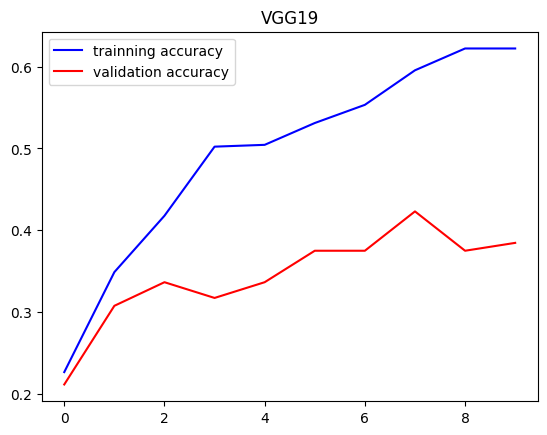

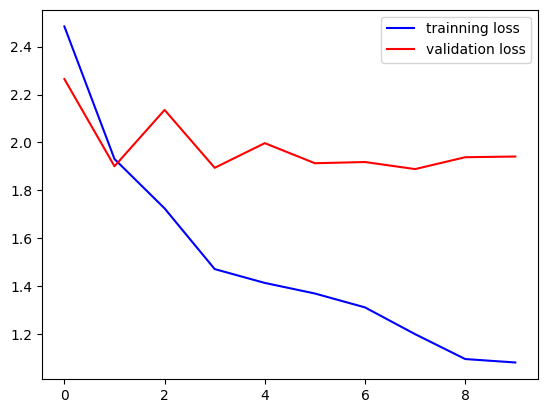

In [ ]:
#plot pour visualiser accuracy and loss
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
# Faire des prédictions à l'aide du modèle "modelvg" sur l'ensemble de test
y_pred = modelvg.predict(test_set_vg19)

7/7 [==============================] - 35s 5s/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)   # Trouver l'indice de la classe prédite ayant la plus haute probabilité pour chaque échantillon
y_pred

array([ 4,  8,  8, 10,  8,  4,  0,  4, 12,  0,  0,  1,  1, 13,  1,  1,  1,
        1,  1,  5,  1, 12,  7,  1,  1,  6,  4,  4,  6,  1,  3,  5,  1,  7,
        1,  7,  4,  4,  8,  4,  4,  4,  8,  4,  4,  4,  4, 12,  5,  1,  5,
        1,  5,  5,  5,  5,  1,  7,  5,  6,  4,  4,  5,  5,  5,  8,  8,  4,
        8,  9,  1, 14,  8, 10,  5, 15, 15, 13,  5,  5,  4, 14,  6, 12, 12,
       12, 13,  3,  1,  1,  5,  1, 12, 12,  4,  4, 15,  1,  5])

In [ ]:
import cv2
import tensorflow as tf
#fonction de préparation des images
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255    # Normaliser les valeurs de pixel pour qu'elles soient dans la plage [0, 1]
    new_array = cv2.resize(img_array, (128, 128))    # Redimensionner l'image à la taille attendue (128x128 pixels)
    return new_array.reshape(-1, 128, 128, 3)

In [ ]:
def prediction_cls(prediction):      #fonction de prediction
    class_labels = ['Beauveria bassiana-->Aspect macroscopique',
                    'Beauveria bassiana-->Aspect microscopique',
                    'Beauveria brongniartii--Aspect macroscopique',
                    'Beauveria brongniartii-->Aspect microscopique',
                    'Metarhizium anisopliae-->Aspect macroscopique',
                    'Metarhizium anisopliae-->Aspect microscopique',
                    'Metarhizium brunneum-->Aspect macroscopique',
                    'Metarhizium brunneum-->Aspect microscopique',
                    'Metarhizium roberstii-->Aspect macroscopique',
                    'Metarhizium roberstii-->Aspect microscopique',
                    'Trichoderma Asperellum-->Aspect macroscopique',
                    'Trichoderma Asperellum-->Aspect microscopique',
                    'Trichoderma harzianum-->Aspect macroscopique',
                    'Trichoderma harzianum-->Aspect microscopique',
                    'Trichoderma viride-->Aspect macroscopique',
                    'Trichoderma viride-->Aspect microscopique']
    predicted_class_idx = np.argmax(prediction)     # Trouver l'indice de la classe prédite avec la probabilité la plus élevée
    return class_labels[predicted_class_idx]        # Retourner le label de classe prédit correspondant à l'indice


In [ ]:
 #Faire la prédiction sur une image préparée
prediction = modelvg.predict([prepare("/content/drive/MyDrive/CHAMPIGNONS_DATA/test/Beauveria brongniartii--Aspect microscopique/B. brongniartii 14.png")])
prediction_cls(prediction)

1/1 [==============================] - 0s 434ms/step


'Metarhizium anisopliae-->Aspect microscopique'

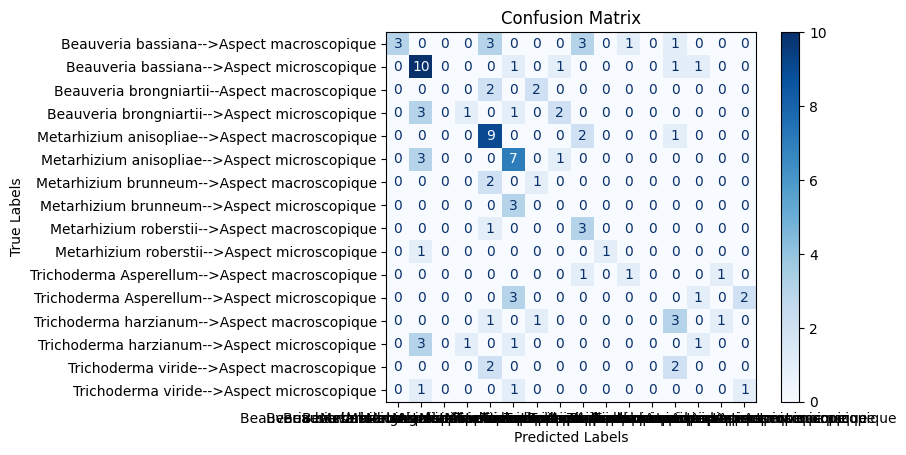

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = test_set_vg19.classes
# Convert y_pred probabilities to class labels
#y_pred_classes = np.argmax(y_pred[:, np.newaxis], axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
class_labels = ['Beauveria bassiana-->Aspect macroscopique','Beauveria bassiana-->Aspect microscopique','Beauveria brongniartii--Aspect macroscopique','Beauveria brongniartii-->Aspect microscopique','Metarhizium anisopliae-->Aspect macroscopique', 'Metarhizium anisopliae-->Aspect microscopique', 'Metarhizium brunneum-->Aspect macroscopique', 'Metarhizium brunneum-->Aspect microscopique', 'Metarhizium roberstii-->Aspect macroscopique', 'Metarhizium roberstii-->Aspect microscopique','Trichoderma Asperellum-->Aspect macroscopique','Trichoderma Asperellum-->Aspect microscopique', 'Trichoderma harzianum-->Aspect macroscopique', 'Trichoderma harzianum-->Aspect microscopique', 'Trichoderma viride-->Aspect macroscopique','Trichoderma viride-->Aspect microscopique']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


In [ ]:
#model saving
modelvg.save("/content/drive/MyDrive/CHAMPIGNONS_DATA/Model.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/CHAMPIGNONS_DATA/Model.h5")

In [ ]:
#utiliser le modele qu on a enregistré pour faire la prédiction
prediction = model.predict([prepare("/content/drive/MyDrive/CHAMPIGNONS_DATA/test/Beauveria bassiana--Aspect microscopique/B. bassina 3.jpg")])
prediction_cls(prediction)

1/1 [==============================] - 1s 525ms/step


'Beauveria bassiana-->Aspect microscopique'